# Description
Beberapa plot yang bisa digunakan
1. Bar chart
2. Line chart
3. Scatterplot
4. Pie chart
5. Histogram
6. Heatmap
7. Boxplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.sort_values('Age')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
255,1,113,64,35,0,33.6,0.543,21,1
60,2,84,0,0,0,0.0,0.304,21,0
102,0,125,96,0,0,22.5,0.262,21,0
182,1,0,74,20,23,27.7,0.299,21,0
623,0,94,70,27,115,43.5,0.347,21,0
...,...,...,...,...,...,...,...,...,...
123,5,132,80,0,0,26.8,0.186,69,0
684,5,136,82,0,0,0.0,0.640,69,0
666,4,145,82,18,0,32.5,0.235,70,1
453,2,119,0,0,0,19.6,0.832,72,0


## Barplot
1. Data yang akan diplot harus di aggregasi terlebih dahulu.
2. Jika ingin melakukan sort values atau dimensi, maka bisa di sort terlebih dahulus sebelum divisulisasi

In [25]:
negara = ['Prancis','Indonesia','Malaysia']
total_penduduk = [50,60,70]
df_negara = pd.DataFrame(negara,total_penduduk).reset_index()
df_negara.columns = ['total_penduduk','Negara']
df_negara_sort = df_negara.sort_values('total_penduduk',ascending=False) #df_negara.sort_values('Negara',ascending=False)
df_negara_sort

,total_penduduk,Negara
2,70,Malaysia
1,60,Indonesia
0,50,Prancis


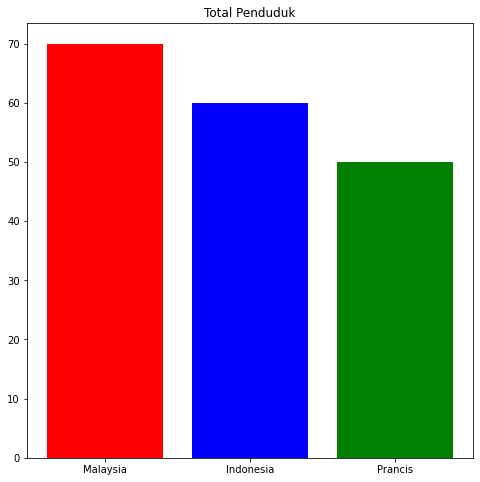

In [63]:
plt.figure(figsize=(8,8))
plt.bar('Negara','total_penduduk',data=df_negara_sort,color=['red','blue','green'])
plt.title('Total Penduduk')
plt.show()

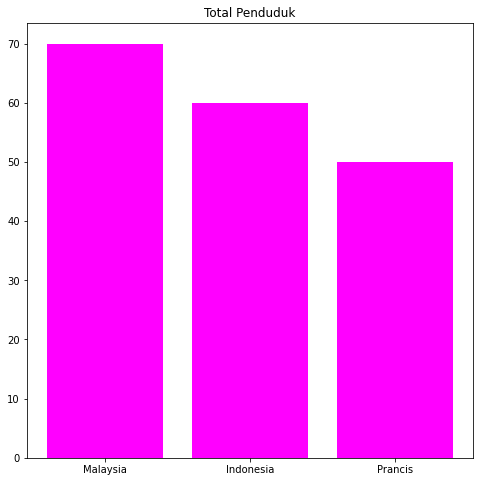

In [64]:
plt.figure(figsize=(8,8))
plt.bar('Negara','total_penduduk',data=df_negara_sort,color='fuchsia')
plt.title('Total Penduduk')
plt.show()

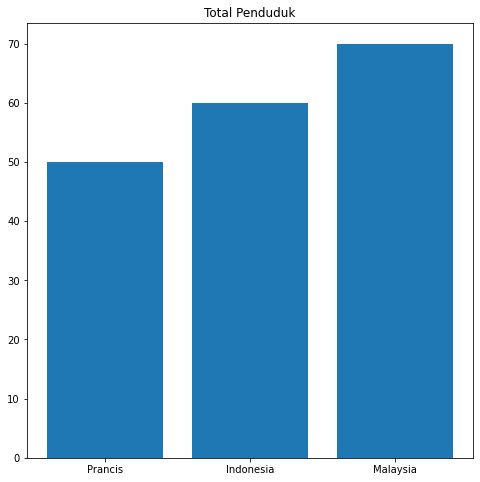

In [15]:
plt.figure(figsize=(8,8))
plt.bar('Negara','total_penduduk',data=df_negara)
plt.title('Total Penduduk')
plt.show()

In [34]:
df1 = df[['Age','BloodPressure']].groupby(by='Age').mean()
df1.reset_index(inplace=True,drop=False)
df1.head()

,Age,BloodPressure
0,21,65.936508
1,22,63.722222
2,23,64.315789
3,24,64.956522
4,25,59.666667


Text(0.5, 1.0, 'Rata-Rata BloodPressure di tiap umur')

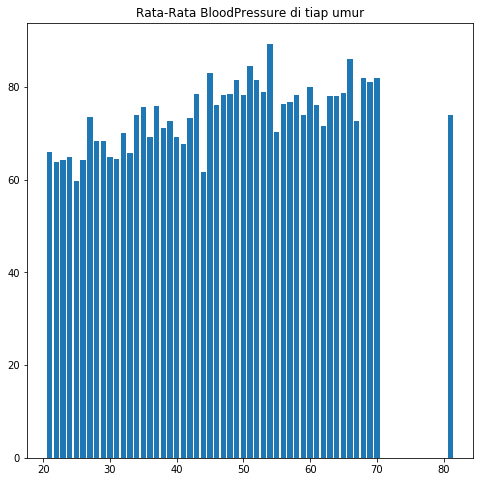

In [7]:
plt.figure(figsize=(8,8))
plt.bar('Age','BloodPressure',data=df1)
plt.title('Rata-Rata BloodPressure di tiap umur')

Text(0.5, 1.0, 'Rata-Rata BloodPressure di tiap umur')

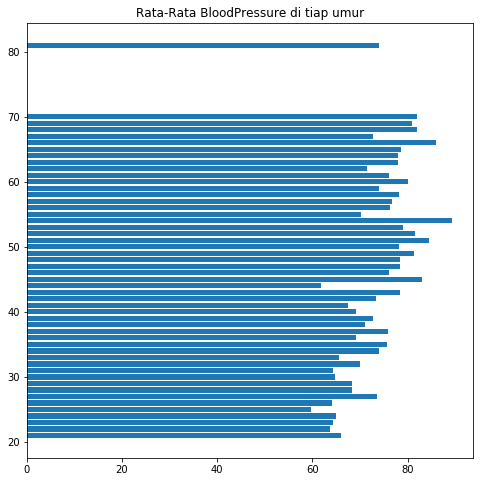

In [8]:
plt.figure(figsize=(8,8))
plt.barh('Age','BloodPressure',data=df1)
plt.title('Rata-Rata BloodPressure di tiap umur')

## Line Chart
1. Data yang akan diplot harus di aggregasi terlebih dahulu.
2. Jika ingin melakukan sort values atau dimensi, maka bisa di sort terlebih dahulus sebelum divisulisasi

Text(0.5, 1.0, 'Rata-Rata BloodPressure di tiap umur')

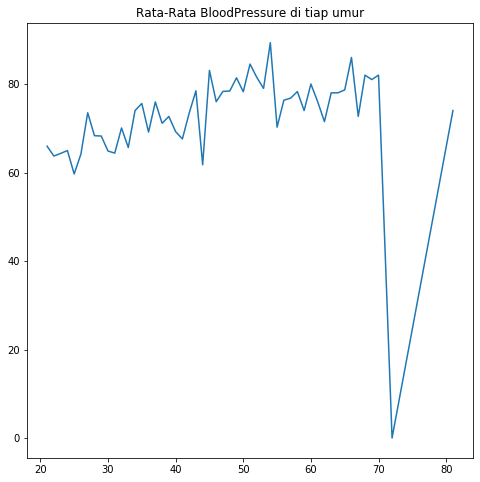

In [9]:
plt.figure(figsize=(8,8))
plt.plot('Age','BloodPressure',data=df1)
plt.title('Rata-Rata BloodPressure di tiap umur')

## Scatterplot
- Data yang akan diplot tidak perlu di aggregasi terlebih dahulu.

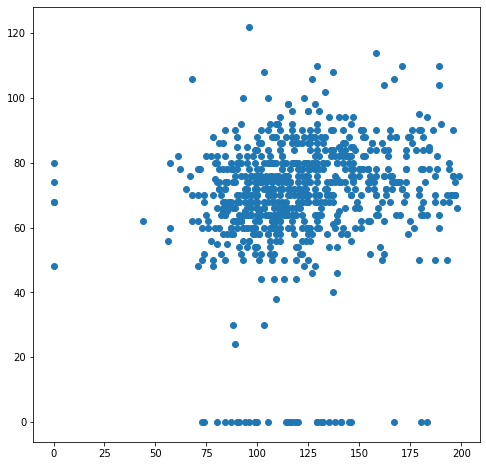

In [10]:
plt.figure(figsize=(8,8))
plt.scatter('Glucose','BloodPressure',data=df)

In [27]:
## Fit Linier Regression Model
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
X = np.array(df.Glucose).reshape((-1,1))
Y = np.array(df.BloodPressure)
fit = model.fit(X,Y)

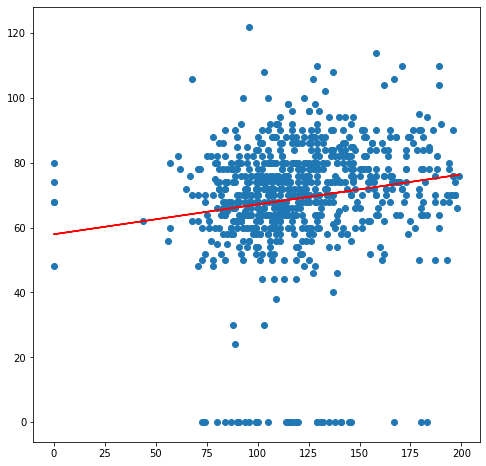

In [30]:
## Add Regresion Line
plt.figure(figsize=(8,8))
plt.scatter('Glucose','BloodPressure',data=df)
plt.plot(X,fit.predict(X),'r')
plt.show()

# Pie Chart
1. Menunjukkan komposisi dari suatu dimensi

In [31]:
import math

In [32]:
## Membuat kelas berdasarkan aturan sturges
list_age = np.array(list(set(df.Age)))

max_value = max(df.Age)
min_value = min(df.Age)
n = len(df.Age)
K = 1 + 3.3*math.log(n,10)
k = (max_value-min_value)/K

batas_bawah = np.array(range(min_value,max_value,11))
batas_atas = batas_bawah + 10

print('Banyak Kelas:',k)
print('Interval:',K)
print('Batas Atas:',batas_atas)
print('Batas Bawah:',batas_bawah)

Banyak Kelas: 5.70250486814686
Interval: 10.521692026103988
Batas Atas: [31 42 53 64 75 86]
Batas Bawah: [21 32 43 54 65 76]


In [23]:
## Total Individu setiap kelas umur
kelas = []
for k in range(len(list_age)):
    for j in range(len(batas_bawah)):
        if df.Age[k] in list(range(batas_bawah[j],batas_atas[j]+1)):
            kelas.append([str(batas_bawah[j]) + '-' + str(batas_atas[j]),df.Age[k]])
df_kelas = pd.DataFrame(kelas,columns=['kelas','total'])
df_group = df_kelas.groupby('kelas').sum()
df_group.reset_index(inplace=True)
df_group

,kelas,total
0,21-31,617
1,32-42,461
2,43-53,437
3,54-64,397


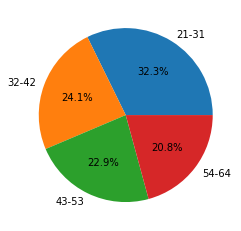

In [24]:
plt.pie('total', labels='kelas', autopct='%1.1f%%',data=df_group)
plt.show()

In [37]:
# contoh 2
negara = ['Prancis','Indonesia','Malaysia']
total_penduduk = [50,60,70]
df_negara = pd.DataFrame(negara,total_penduduk).reset_index()
df_negara.columns = ['total_penduduk','Negara']
df_negara

,total_penduduk,Negara
0,50,Prancis
1,60,Indonesia
2,70,Malaysia


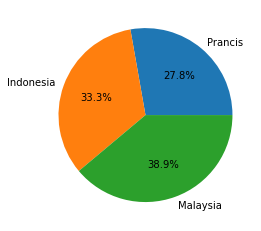

In [38]:
plt.pie('total_penduduk', labels='Negara', autopct='%1.1f%%',data=df_negara)
plt.show()

In [42]:
# return values and percentage

In [39]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

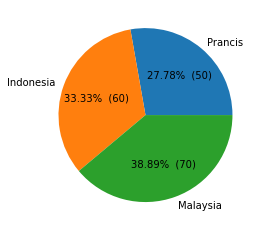

In [50]:
plt.pie('total_penduduk', labels='Negara', autopct=make_autopct(df_negara['total_penduduk']),data=df_negara)
plt.show()

# Histogram
Bins menunjukkan banyaknya batang (mirip dengan banyaknya kelas)

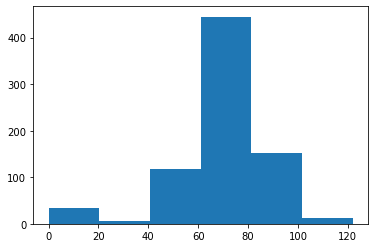

In [60]:
plt.hist(df.BloodPressure,bins=6)
plt.show()

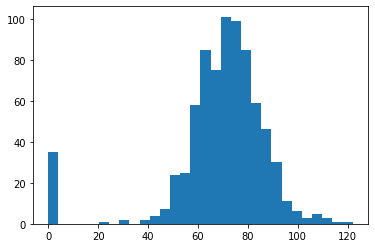

In [25]:
plt.hist(df.BloodPressure,bins=30)
plt.show()

# Heatmap

In [26]:
korelasi = np.array(df.corr())
korelasi = korelasi.round(2)
row = col = df.columns.values.tolist()

<Figure size 720x720 with 0 Axes>

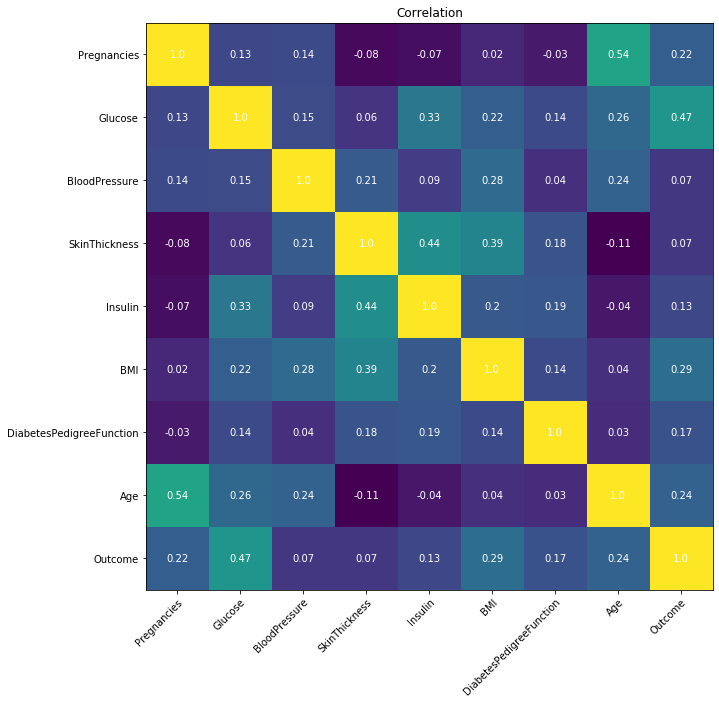

In [27]:
plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(korelasi)

ax.set_xticks(np.arange(len(row)))
ax.set_yticks(np.arange(len(col)))

ax.set_xticklabels(row) # label sumbu x
ax.set_yticklabels(col) # label sumbu y

plt.setp(ax.set_xticklabels(row),rotation=45,ha="right",rotation_mode="anchor")

for k in range(len(row)):
    for j in range(len(col)):
        text = ax.text(k,j,korelasi[k,j],ha="center",va="center",color="w")

ax.set_title("Correlation")
fig.tight_layout()
plt.show()

# Boxplot
- Bisa digunakan untuk melihat distribusi suatu data
- Bisa digunakan untuk melihat ada tidaknya outlier

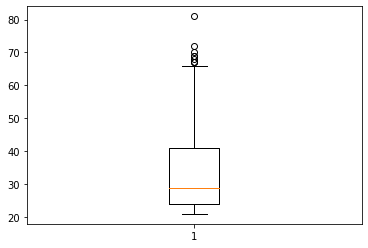

In [28]:
plt.boxplot(df.Age)
plt.show()

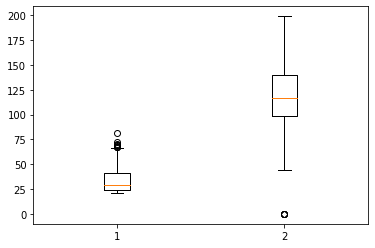

In [29]:
plt.boxplot([df.Age,df.Glucose])
plt.show()

## Refference
1. https://matplotlib.org/
2. https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
3. https://matplotlib.org/3.2.2/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py